In [1]:
##Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random as rd
np.random.seed(sum(map(ord, "aesthetics")))

In [2]:
##              **** csv file data cleansing ****
## Problems with our data was evident when attempts to convert columns from
## strings to numbers were failing, and our first attempt to fix this was 
## to remove the companies and investments that had foreign currencies.  
## Further data cleansing continued with the organizations.csv file which 
## had over 497,523 records.  I merged the organizations.csv file with the 
## completed merged_df to create a smaller file new_org, but using new_org
## in place of organizations.csv caused the final merged_df record count to 
## increase.  At that point, I ran new_org through a drop_duplicates delete 
## process, and ended up with 6,696 unique organization records.  After this
## the record count improved (10,270), but still didn't make sense.  Logically, 
## we shouldn't have more than 9,069 records (compnay-funding merged records),
## since we were only matching on Company to get the URL.  So, after a manual 
## review found duplicates in merged_df, I decided to run the merged_df data 
## frame through a drop_duplicates delete process which resulted in the final 
## merged_df record count of 8,798.  The previous data frame had 59 records 
## of funding type D and that changed to 41 after the drop duplicates delete 
## process.  After further review of the 59 Series D records, I found 18 
## likely duplicates which accounted for the change from 59 to 41 Series D 
## records.   

In [3]:
## Read file and then sort for companies_df = 8,664 records
csv_file = "a_companies.csv"
companies_df = pd.read_csv(csv_file, encoding="iso-8859-1",
                           parse_dates=["Founded Date","Closed Date",
                                        "Last Funding Date"])
companies_df = companies_df.sort_values("Company Name").reset_index(drop=True)
#companies_df.columns
#print(len(companies_df.index))

In [4]:
# Remove some columns from the data frame
companies_df = companies_df[["Company Name", "Founded Date", "Closed Date", 
                             "Number of Funding Rounds", "Last Funding Date", 
                             "Last Funding Amount", "Total Funding Amount", "Status"]]

In [5]:
# Rename columns
companies_pf = companies_df.rename(columns={
    "Company Name" : "Company",
    "Number of Funding Rounds" : "Funding Rounds"   
})
#companies_pf.head(5)

In [6]:
## Read file and then sort for funding_df = 10,901 records
funding = "a_funding_rounds.csv"
funding_df = pd.read_csv(funding, encoding="iso-8859-1", 
                         parse_dates=["Announced On Date"])
funding_df = funding_df.sort_values("Company Name").reset_index(drop=True)
#funding_df.columns
#print(len(funding_df.index))

In [7]:
# Remove some columns from the data frame
funding_df = funding_df[["Company Name", 
                         "Funding Type", 
                         "Money Raised", 
                         "Announced On Date"]]

In [8]:
# Rename columns
funding_pf = funding_df.rename(columns={
    "Company Name" : "Company"
})
#funding_pf.head(5)


In [9]:
# Merge companies_pf (8,664) and funding_pf (10,901)on Company to create merged_data = 9,069
merged_data = pd.merge(companies_pf, funding_pf,how="inner",on="Company")
#merged_data.head(5)
#print(len(merged_data.index))

In [10]:
## Read file of organizations 6,696 records - was organization.csv 497,523
org = "a_unique_organizations.csv"
unique_org = pd.read_csv(org, encoding="iso-8859-1")
#unique_org.head(5)  
#print(len(unique_org.index)) 

In [11]:
# merged_data = 9,069 with unique_org = 6696 to create merged_df = 10,270  
merged_df1 = pd.merge(merged_data, unique_org, left_on="Company", right_on="Company", how='inner')
#merged_df1.head(5)
#print(len(merged_df1.index))


In [12]:
# Remove duplicates from merged_df1 = 10,270 to create merged_df = 8,798 which removed 
# 1472 records based on matching Company, Funding Type, and Money Raised.
merged_df = merged_df1.drop_duplicates(subset=["Company","Funding Type","Money Raised"],
                                       keep="first").reset_index(drop=True)
#merged_df.head(5)
#print(len(merged_df.index))

In [13]:
# Convert fields to usable formats
merged_df["Money Raised"] = merged_df["Money Raised"].str.strip() \
                                                   .replace('[\$,]','', regex=True ).astype(np.int64)
    
merged_df["Last Funding Amount"] = merged_df["Last Funding Amount"] \
                                                   .replace('[\$,]','', regex=True ).astype(np.int64)
merged_df["Total Funding Amount"] = merged_df["Total Funding Amount"] \
                                                   .replace('[\$,]','', regex=True ).astype(np.int64)
merged_df.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca068193ca9ce42ce20f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5efe1d5f8ef2edb254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68c903c0898789bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c361d7931fd3bcf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a304ff5893d0ae3ceb761e1c251,https://www.10by10.io/


In [14]:
# Save Data from all  to csv without index, with header
#merged_df.to_csv("all_files_merged_df.csv", index=False, header=True)


In [15]:
# Expore the data - Dates
min_found_date = min(merged_df["Founded Date"])
print("Min Founded Date: ", min_found_date)

Min Founded Date:  2012-01-01 00:00:00


In [16]:
# Expore the data - Status
# 232 records with Status == "Closed"
closed_df = merged_df.loc[merged_df["Status"] == "Closed"].reset_index(drop=True)
#closed_df.head(5)
#print(len(closed_df.index))

In [17]:
# 232 - 53 records based on matching Company = 179 closed_nodups
#closed_nodups = closed_df.drop_duplicates(subset=["Company"],
#                                       keep="last").reset_index(drop=True)
#closed_nodups.head(5)
#print(len(closed_nodups.index))

In [18]:
# Save Data from all  to csv without index, with header
#closed_nodups.to_csv("closed_nodups.csv", index=False, header=True)

In [19]:
# Expore the data - Dates
max_close_date = max(closed_df["Closed Date"])
print("Max Closed Date: ", max_close_date)

Max Closed Date:  2017-08-26 00:00:00


In [20]:
# Expore the data - Status
# 7982 records with Status == "Operating"
oper_df = merged_df.loc[merged_df["Status"] == "Operating"].reset_index(drop=True)
#oper_df.head(5)
#print(len(oper_df.index))

In [21]:
# Explore the data - All the Funding Type counts
funding_type = merged_df["Funding Type"].value_counts()
funding_type

Seed        5174
Series A    2461
Series B     904
Series C     218
Series D      41
Name: Funding Type, dtype: int64

In [22]:
# Explore the data - All the Status counts
status_counts = merged_df["Status"].value_counts()
status_counts

Operating       7982
Was Acquired     548
Closed           232
IPO               36
Name: Status, dtype: int64

In [23]:
# 5174 records with funding type "Seed"
# 4988 "Seed" records with Status "Operating"
seed_df = merged_df.loc[(merged_df["Funding Type"] == "Seed") & 
                   (merged_df["Status"] != "Closed")].reset_index(drop=True)
#seed_df.head(5)
#print(len(seed_df.index))

In [24]:
# 2461 records with funding type "Series A"
# 2425 "Seed" records and Status != "Closed"
series_a = merged_df.loc[(merged_df['Funding Type'] == "Series A") &
                  (merged_df["Status"] != "Closed")].reset_index(drop=True)
#series_a.head(5)
#print(len(series_a.index))

In [25]:
# 904 records with Funding Type "Series B"
# 894 "Series B" records and Status != "Closed"
series_b = merged_df.loc[(merged_df['Funding Type'] == "Series B") &
                   (merged_df["Status"] != "Closed")].reset_index(drop=True)
#series_b.head(5)
#print(len(series_b.index))

In [26]:
# 218 records with Funding Type "Series C"
# 218 "Series C" and Status != "Closed"
series_c = merged_df.loc[(merged_df['Funding Type'] == "Series C") &
                  (merged_df["Status"] != "Closed")].reset_index(drop=True)
#series_c.head(5)
#print(len(series_c.index))

In [27]:
# 41 records with Funding Type "Series D"
# 41 "Series D" and Status != "Closed"
series_d = merged_df.loc[(merged_df['Funding Type'] == "Series D") &
                 (merged_df["Status"] != "Closed")].reset_index(drop=True)
#series_d.head(5)
#print(len(series_d.index))

In [28]:
# # Build a scatter plot for each data type
# plt.scatter(seed_df["Funding Type"], 
#             seed_df["Status"],
#             s=100, edgecolor="black", linewidths=1, c="red", marker="o", 
#             alpha=0.8)

# # Incorporate the other graph properties
# plt.title("Funding Type Status")
# plt.ylabel("Funding Type")
# plt.xlabel("Status")
# plt.grid(True)

# # Save the figure
# plt.savefig("funding_type_scatter_chart.png")

# # Show plot
# plt.show()

In [29]:
# Some ideas from Rachel for grouping and plotting

# #seed = merged_df[merged_df['Status'] == "Operating"]
# seed = merged_df[merged_df['Status'] == "Was Acquired"]
# seed = merged_df[merged_df['Status'] == "Closed"]
# seed = merged_df[merged_df['Status'] == "IPO"]

# # # x-axis
# seed_operating = seed.groupby(["Status"]).count()["Closed"]
# # #y-axis
# seed_acquired = seed.groupby(["Status"]).count()["Was Acquired"]

# # # x-axis
# seed_closedt = seed.groupby(["Status"]).count()["Closed"]
# # #y-axis
# seed_ips = seed.groupby(["Status"]).count()["IPO"]

In [30]:
funding_sum = merged_df.groupby('Funding Type')["Money Raised"].sum()
#funding_sum

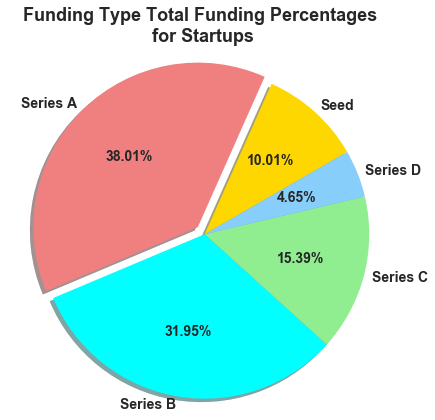

In [31]:
plt.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_sum
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0, 0.06, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Funding Type Total Funding Percentages\n for Startups", 
             weight='bold').set_fontsize('18')
ax.pie(numbers, explode=explode, labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'},
       shadow=True, startangle=30, labeldistance=1.05)
ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_sum_pie_chart.png",bbox_inches="tight")

plt.show()

In [32]:
# sum of counts is 10278
funding_pct = merged_df.groupby('Funding Type')["Money Raised"].count()
funding_pct


Funding Type
Seed        5174
Series A    2461
Series B     904
Series C     218
Series D      41
Name: Money Raised, dtype: int64

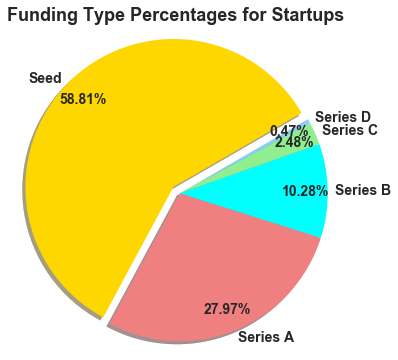

In [33]:
plt.rcParams['font.size'] = 12.0

fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_pct
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0.06, 0, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Funding Type Percentages for Startups", weight='bold').set_fontsize('18')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'}, 
       shadow=True, startangle=30, pctdistance=.85, labeldistance=1.05)

ax.axis("equal")

# Save the figure
#plt.tight_layout()
plt.savefig("funding_type_count_pie_chart.png",bbox_inches="tight")

plt.show()

In [34]:
# y axis for funding_average_per_type_bar_chart 
fund_avgs = np.array(merged_df.groupby('Funding Type')["Money Raised"].median()/1000000)
fund_avgs

array([  0.6,   6.5,  16. ,  30. ,  46. ])

In [35]:
# x axis for funding_average_per_type_bar_chart 
funding_types = merged_df["Funding Type"].unique()
funding_types

array(['Seed', 'Series A', 'Series B', 'Series C', 'Series D'], dtype=object)

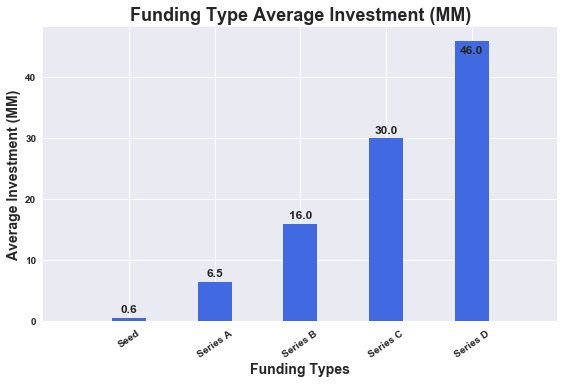

In [36]:
# funding_average_per_type_bar_chart 
# Helpful links to building this chart
# http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
# http://matplotlib.org/examples/api/barchart_demo.html
# https://matplotlib.org/examples/color/named_colors.html

# Dependencies
import matplotlib.pyplot as plt
import numpy as np

# Set the label on top of the bars
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for rect in rects:
        height = rect.get_height()
        #print("height is ", height)
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)
        #print("p_height is ", p_height)
        # fit the label above the column or inside
        if p_height > 0.95: # arbitrary
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%2.1f' % float(height),
                ha='center', va='bottom', weight='bold')

fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(1, len(funding_types)+ 1)
xtick_locations = [x for x in x_axis]

ax.set_title("Funding Type Average Investment (MM)", weight='bold').set_fontsize('18')
ax.set_xlabel("Funding Types", weight='bold').set_fontsize('14')
ax.set_ylabel("Average Investment (MM)", weight='bold').set_fontsize('14')

ax.set_xlim(0, len(funding_types)+ 1)

plt.ticklabel_format(style = 'plain')

rects1 = ax.bar(x_axis, fund_avgs, facecolor="royalblue", width=.4)
autolabel(rects1, ax)
ax.set_xticks(xtick_locations)

ax.set_xticklabels(funding_types, rotation=35, weight='bold')
ax.set_yticklabels([0,10,20,30,40,50],
                   rotation=360, weight='bold')

plt.tight_layout()
plt.savefig("funding_type_avg_investment_bar_chart.png")
plt.show()

In [37]:
## Add these columns to the series_d data frame for scraping
series_d["Total Visits"] = ""
series_d["Avg Visit Duration"] = ""
series_d["Pages Per Visit"] = ""
series_d["Bounce Rate"] = ""
series_d.head(5)
# series_d

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage,Total Visits,Avg Visit Duration,Pages Per Visit,Bounce Rate
0,908 Devices,2012-01-01,NaT,5,2017-03-15,20000000,49300000,Operating,Series D,20000000,2017-03-15,9c3b4ae472afb6d63f029c811f56fb40,http://908devices.com,,,,
1,Alector,2013-01-01,NaT,3,2016-01-07,29500000,61500000,Operating,Series D,29500000,2016-01-07,9dd3b221ff3bbdb834da7774e6510b63,http://alector.com,,,,
2,AveXis,2013-01-01,NaT,4,2015-09-08,65000000,75000000,Was Acquired,Series D,65000000,2015-09-08,b09be91c91a9632e870dc5ed83c46717,https://avexis.com/,,,,
3,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,2017-08-24,e35a34d36b1d1d5b1665190c7daa4460,http://www.blendsd.com,,,,
4,Bustle Digital Group,2013-01-01,NaT,5,2017-03-10,12000000,50500000,Operating,Series D,12000000,2017-03-10,b7d88b9f3a746aea845159ecd4851518,http://bustle.com,,,,


In [38]:
## Add these columns to the closed_df data frame for scraping
closed_df["Total Visits"] = ""
closed_df["Avg Visit Duration"] = ""
closed_df["Pages Per Visit"] = ""
closed_df["Bounce Rate"] = ""
closed_df.head(5)
# closed_df

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage,Total Visits,Avg Visit Duration,Pages Per Visit,Bounce Rate
0,27 Perry,2012-01-01,2013-01-01,1,2012-05-17,118000,118000,Closed,Seed,118000,2012-05-17,40d8d076df13484162029389201bb1fa,http://www.27perry.com,,,,
1,4wrdtech,2015-05-29,NaT,1,2015-12-08,80000,80000,Closed,Seed,80000,2015-12-08,84420e6294f4ea624ed9711a96f467c9,https://4wrdtech.com,,,,
2,Accordion Health,2014-05-14,2017-06-01,2,2015-11-01,1000000,1150000,Closed,Seed,1000000,2015-11-01,dad5fb42208622ca30fc7db8349a3a1c,https://accordionhealth.com,,,,
3,Accordion Health,2014-05-14,2017-06-01,2,2015-11-01,1000000,1150000,Closed,Seed,150000,2014-07-02,dad5fb42208622ca30fc7db8349a3a1c,https://accordionhealth.com,,,,
4,Alekto,2012-07-01,2013-01-01,1,2012-08-27,50000,50000,Closed,Seed,50000,2012-08-27,0e19d30ebf03535f97daef13751335e0,http://www.alekto.co,,,,


In [52]:
## Read file and then sort for funding_df = 10,901 records
closed1 = "closed_df1.csv"
closeddf1 = pd.read_csv(closed1, encoding="iso-8859-1",
                           parse_dates=["Founded Date","Closed Date",
                                        "Last Funding Date"])
#print(len(closed1))
#closeddf1

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage,Total Visits,Avg Visit Duration,Pages Per Visit,Bounce Rate
0,27 Perry,2012-01-01,2013-01-01,1,2012-05-17,118000,118000,Closed,Seed,118000,5/17/2012,40d8d076df13484162029389201bb1fa,http://www.27perry.com,NaN,NaN,NaN,NaN
1,4wrdtech,2015-05-29,NaT,1,2015-12-08,80000,80000,Closed,Seed,80000,12/8/2015,84420e6294f4ea624ed9711a96f467c9,https://4wrdtech.com,NaN,NaN,NaN,NaN
2,Accordion Health,2014-05-14,2017-06-01,2,2015-11-01,1000000,1150000,Closed,Seed,150000,7/2/2014,dad5fb42208622ca30fc7db8349a3a1c,https://accordionhealth.com,NaN,NaN,NaN,NaN
3,Alekto,2012-07-01,2013-01-01,1,2012-08-27,50000,50000,Closed,Seed,50000,8/27/2012,0e19d30ebf03535f97daef13751335e0,http://www.alekto.co,NaN,NaN,NaN,NaN
4,Alexis Graham,2014-01-15,NaT,1,2014-06-01,100000,100000,Closed,Seed,100000,6/1/2014,22f6492b66a78ff36256ed387a92fb41,https://accelerateproduct.com/,NaN,NaN,NaN,NaN
5,Alminder,2012-04-01,NaT,1,2013-10-22,1525000,1525000,Closed,Seed,1525000,10/22/2013,ecafe94154b17c6d62e2ec5437bf9d05,http://mynd.me,NaN,NaN,NaN,NaN
6,Alumni Labs,2013-06-01,NaT,1,2013-06-01,20000,20000,Closed,Seed,20000,6/1/2013,73c4766994c100903d0117d936f8e2a7,http://www.alumnilabs.com,NaN,NaN,NaN,NaN
7,Applits,2012-07-01,2015-08-01,1,2013-07-09,63000,63000,Closed,Seed,63000,7/9/2013,318ea816d16abc8d4782700fd8a56ea9,http://applits.com,NaN,NaN,NaN,NaN
8,Armour.io - OWN YOUR DATA,2014-03-07,2016-06-19,1,2014-10-01,350000,350000,Closed,Seed,350000,10/1/2014,710f8064a7df8cfd5cda4b94e5edbd04,http://www.armour.io,NaN,NaN,NaN,NaN
9,Ashvattha Therapeutics,2015-01-01,NaT,1,2016-06-07,37400,37400,Closed,Seed,37400,6/7/2016,30483541966d7523cae513446900bfea,http://www.ashvatthatherapeutics.com/,NaN,NaN,NaN,NaN


In [54]:
## Web scraping program with 45 second sleep time.

## Splinter documenation:
## https://github.com/douglasmiranda/splinter-examples/blob/master/another_examples/screenshot.py
## http://splinter.readthedocs.io/en/latest/tutorial.html

## BeautifulSoup Documentation:
## https://www.crummy.com/software/BeautifulSoup/bs4/doc

from splinter import Browser
import csv
from bs4 import BeautifulSoup 
import time

# # browser = Browser('chrome')
# # browser = Browser('firefox')

# Set some URL parameters
url1 = "https://www.similarweb.com/website/" 
url_suffix = "#overview"

# # csv file names and data frames to process
# # file_name = ['series_d', 'closed_df']
file_name = ['closeddf1']

with Browser() as browser:
    for fn in file_name:
        #print("file name is ", fn)
        if fn == 'series_d':
            scrape_df = series_d
        elif fn == 'closeddf1':
            scrape_df = closeddf1
        else:
            print("unknown input!  Exiting loop...")
            break
        # Get the index for the file name
        fn_index = file_name.index(fn)
        #print("fn_index is ", fn_index)
        
        # loop thru the urls all data frames 
        counter = 0
        for index, row in scrape_df.iterrows():
            url = ""
            # url2 is a list
            url2 = row["Homepage"].split('/')
            #print("url2 is ", url2)
            if len(url2) > 2:
                counter += 1
                url = url1 + url2[2] + url_suffix
                print("url counter: ", counter,end=" - ")
                print(url)
        
            try:
                browser.visit(url)
                time.sleep(45)
                html = browser.html
                soup = BeautifulSoup(html, "html.parser")
                #print(soup.prettify())
   
                count = 0
                # Grab the 4 activity stats from the html 
                for line in soup.findAll('span',class_="engagementInfo-valueNumber js-countValue"):
                    print(line.get_text())
                    count += 1
                    # Write to data frame
                    if count == 1:
                        scrape_df.set_value(index, "Total Visits", line.getText())
                    elif count == 2:
                        scrape_df.set_value(index, "Avg Visit Duration", line.getText())
                    elif count == 3:
                        scrape_df.set_value(index, "Pages Per Visit", line.getText())
                    else:
                        scrape_df.set_value(index, "Bounce Rate", line.getText())
            except:
                print("Error with url: ", url)
        # Save screen scraped data to csv without index and with header
        scrape_df.to_csv( file_name[fn_index] + "_plus_scraping.csv", index=False, header=True)
        print("Created " + file_name[fn_index] + "_plus_scraping.csv")
        
        print("urls processed: ", counter)


url counter:  1 - https://www.similarweb.com/website/www.27perry.com#overview
<12K
00:00:39
2.00
N/A
url counter:  2 - https://www.similarweb.com/website/4wrdtech.com#overview
url counter:  3 - https://www.similarweb.com/website/accordionhealth.com#overview
<12K
00:00:21
1.81
77.55%
url counter:  4 - https://www.similarweb.com/website/accordionhealth.com#overview
Error with url:  https://www.similarweb.com/website/accordionhealth.com#overview
url counter:  5 - https://www.similarweb.com/website/www.alekto.co#overview
<12K
00:01:47
2.00
N/A
url counter:  6 - https://www.similarweb.com/website/accelerateproduct.com#overview
<12K
N/A
N/A
N/A
url counter:  7 - https://www.similarweb.com/website/mynd.me#overview
<12K
N/A
1.29
71.39%
url counter:  8 - https://www.similarweb.com/website/www.alumnilabs.com#overview
<12K
N/A
N/A
N/A
url counter:  9 - https://www.similarweb.com/website/applits.com#overview
<12K
00:00:01
1.02
6.19%
url counter:  10 - https://www.similarweb.com/website/www.armour.

Error with url:  https://www.similarweb.com/website/www.livrada.com#overview
url counter:  103 - https://www.similarweb.com/website/www.locish.com#overview
Error with url:  https://www.similarweb.com/website/www.locish.com#overview
url counter:  104 - https://www.similarweb.com/website/magnifi.fm#overview
Error with url:  https://www.similarweb.com/website/magnifi.fm#overview
url counter:  105 - https://www.similarweb.com/website/marvincar.com#overview
Error with url:  https://www.similarweb.com/website/marvincar.com#overview
url counter:  106 - https://www.similarweb.com/website/www.medgrc.com#overview
Error with url:  https://www.similarweb.com/website/www.medgrc.com#overview
url counter:  107 - https://www.similarweb.com/website/mindpirate.com#overview
Error with url:  https://www.similarweb.com/website/mindpirate.com#overview
url counter:  108 - https://www.similarweb.com/website/www.modabound.com#overview
Error with url:  https://www.similarweb.com/website/www.modabound.com#overvi

Error with url:  https://www.similarweb.com/website/www.sprig.com#overview
url counter:  162 - https://www.similarweb.com/website/www.sprig.com#overview
Error with url:  https://www.similarweb.com/website/www.sprig.com#overview
url counter:  163 - https://www.similarweb.com/website/www.sprig.com#overview
Error with url:  https://www.similarweb.com/website/www.sprig.com#overview
url counter:  164 - https://www.similarweb.com/website/www.sprig.com#overview
Error with url:  https://www.similarweb.com/website/www.sprig.com#overview
url counter:  165 - https://www.similarweb.com/website/www.sqwiggle.com#overview
Error with url:  https://www.similarweb.com/website/www.sqwiggle.com#overview
url counter:  166 - https://www.similarweb.com/website/www.standoffer.com#overview
Error with url:  https://www.similarweb.com/website/www.standoffer.com#overview
url counter:  167 - https://www.similarweb.com/website/www.standoffer.com#overview
Error with url:  https://www.similarweb.com/website/www.stand

url counter:  218 - https://www.similarweb.com/website/www.xdynia.com#overview
Error with url:  https://www.similarweb.com/website/www.xdynia.com#overview
url counter:  219 - https://www.similarweb.com/website/www.yakify.com#overview
Error with url:  https://www.similarweb.com/website/www.yakify.com#overview
url counter:  220 - https://www.similarweb.com/website/www.yeloha.com#overview
Error with url:  https://www.similarweb.com/website/www.yeloha.com#overview
url counter:  221 - https://www.similarweb.com/website/www.yeloha.com#overview
Error with url:  https://www.similarweb.com/website/www.yeloha.com#overview
url counter:  222 - https://www.similarweb.com/website/www.yikyak.com#overview
Error with url:  https://www.similarweb.com/website/www.yikyak.com#overview
url counter:  223 - https://www.similarweb.com/website/www.yikyak.com#overview
Error with url:  https://www.similarweb.com/website/www.yikyak.com#overview
url counter:  224 - https://www.similarweb.com/website/www.yikyak.com#

WebDriverException: Message: Tried to run command without establishing a connection


In [55]:
scrape_df.to_csv( "closed_df1_plus_scraping.csv", index=False, header=True)

In [41]:
##
## Reload series_d data to work with Screen scrape data without scraping
##
## Read file 
# csv_file = "series_d_plus_scraping.csv"
# series_d = pd.read_csv(csv_file, encoding="iso-8859-1", 
#            parse_dates=["Founded Date", "Last Funding Date", "Announced On Date"])
# series_d.head(5)
# series_d.dtypes

In [42]:
# regex module
# import re  

# ## Total Visits: strip non-numeric characters and convert to float64
# for index, row in series_d.iterrows():
#     print("index is: ", index)
#     print(row["Total Visits"])
#     print(type(row["Total Visits"]))
    
#     str1 = str(row["Total Visits"])
#     if "K" in str1:
#         str1 = re.sub('[<K]', '', str1)
#         flt_str1 = float(str1) * 1000
#         print("str1 with a K is ", str1)
#         series_d.set_value(index, "Total Visits", flt_str1)
#     else:
#         str1 = re.sub('[<M]', '', str1)
#         flt_str1 = float(str1) * 1000000
#         print("other str1 is ", str1)
#         series_d.set_value(index, "Total Visits", flt_str1)

# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# series_d["Total Visits"] = series_d["Total Visits"]      
# series_d   
# series_d.dtypes

In [43]:
## Convert string columns into usable data types

## Convert a column to datetime64 type with only the time?
## pd.to_datetime.dt.time is a datetime.time object but not datetime64.
## Therefore, it is correct that the dtype for the column is object.  
## Converting Avg Visit Duration to datetime.time renders the desired 
## format 00:00:00.
## Check out this documentation on Time series:
## https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# series_d["Avg Visit Duration"] = pd.to_datetime(series_d["Avg Visit Duration"],format="%H:%M:%S").dt.time

# series_d["Bounce Rate"] = series_d["Bounce Rate"].replace('[%]','', regex=True ).astype(np.float64)

# series_d["Pages Per Visit"] = series_d["Pages Per Visit"].astype(np.float64)

# series_d
# series_d.dtype

In [44]:
##
## Reload closed_df data to work with Screen scrape data without more scraping
##
## Read file 
# csv_file = "closed_df_plus_scraping.csv"
# closed_df = pd.read_csv(csv_file, encoding="iso-8859-1", 
#            parse_dates=["Founded Date", "Last Funding Date", "Announced On Date"])

# closed_df["Money Raised"] = top_orgs["Money Raised"].replace('[\$,]','', regex=True ).astype(np.int64)
# closed_df["Homepage"] = top_orgs["Homepage"].replace(np.nan, '', regex=True)
# closed_df["Total Visits"] = top_orgs["Total Visits"].replace(np.nan, 0, regex=True)
# closed_df["Pages Per Visit"] = top_orgs["Pages Per Visit"].replace(np.nan, 0, regex=True)
# closed_df["Bounce Rate"] = top_orgs["Bounce Rate"].replace(np.nan, 0, regex=True)

# closed_df.head(5)
# closed_df.dtypes

In [45]:
# regex module
# import re  

# ## Total Visits: strip non-numeric characters and convert to float64
# for index, row in closed_df.iterrows():
#     print("index is: ", index)
#     print(row["Total Visits"])
#     print(type(row["Total Visits"]))
    
#     str1 = str(row["Total Visits"])
#     if "K" in str1:
#         str1 = re.sub('[<K]', '', str1)
#         flt_str1 = float(str1) * 1000
#         print("str1 with a K is ", str1)
#         closed_df.set_value(index, "Total Visits", flt_str1)
#     else:
#         str1 = re.sub('[<M]', '', str1)
#         flt_str1 = float(str1) * 1000000
#         print("other str1 is ", str1)
#         closed_df.set_value(index, "Total Visits", flt_str1)

# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# closed_df["Total Visits"] = closed_df["Total Visits"]      
# closed_df   
# closed_df.dtypes

In [46]:
## Convert string columns into usable data types

## Convert a column to datetime64 type with only the time?
## pd.to_datetime.dt.time is a datetime.time object but not datetime64.
## Therefore, it is correct that the dtype for the column is object.  
## Converting Avg Visit Duration to datetime.time renders the desired 
## format 00:00:00.
## Check out this documentation on Time series:
## https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# closed_df["Avg Visit Duration"] = pd.to_datetime(closed_df["Avg Visit Duration"],format="%H:%M:%S").dt.time

# closed_df["Bounce Rate"] = closed_df["Bounce Rate"].replace('[%]','', regex=True ).astype(np.float64)

# closed_df["Pages Per Visit"] = closed_df["Pages Per Visit"].astype(np.float64)

# closed_df
# closed_df.dtype